In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Group

In [3]:
#creating a table from scratch 
cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate'),
    'Price', make_array(3.55, 4.75, 6.55, 5.25, 5.25),
    'Calories', make_array(200, 345, 230, 500, 245)
)
cones

Flavor,Price,Calories
strawberry,3.55,200
chocolate,4.75,345
chocolate,6.55,230
strawberry,5.25,500
chocolate,5.25,245


In [4]:
#group by flavor
cones.group('Flavor')

Flavor,count
chocolate,3
strawberry,2


In [5]:
cones.group('Flavor', sum)

Flavor,Price sum,Calories sum
chocolate,16.55,820
strawberry,8.8,700


In [6]:
#what happens if the data is not numerical?
cones.with_column('Awards', make_array('None', 'None', 'Five Stars', 'Four Stars', 'None')) #.group('Flavor', sum)

Flavor,Price,Calories,Awards
strawberry,3.55,200,None
chocolate,4.75,345,None
chocolate,6.55,230,Five Stars
strawberry,5.25,500,Four Stars
chocolate,5.25,245,None


In [7]:
#let's try a different function instead of sum. What do you think will happen?
cones.group('Flavor', max)

Flavor,Price max,Calories max
chocolate,6.55,345
strawberry,5.25,500


In [8]:
#could you get the same result using where?

In [9]:
cones.where('Flavor', 'chocolate').column('Price').max()

6.5499999999999998

In [10]:
cones.group('Flavor', np.mean)

Flavor,Price mean,Calories mean
chocolate,5.51667,273.333
strawberry,4.4,350


In [14]:
cones.group('Flavor', np.mean)

Flavor,Price mean,Calories mean
chocolate,5.51667,273.333
strawberry,4.4,350


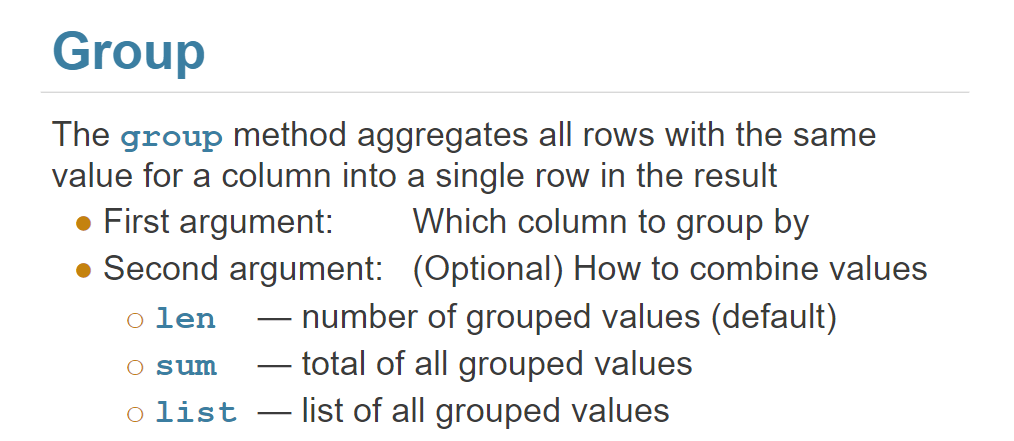

In [29]:
from IPython.display import Image
Image("group.png", width=600)

## Basketball Data

In [15]:
nba = Table.read_table('nba_salaries.csv')
nba = nba.relabeled("'15-'16 SALARY", 'SALARY')
nba.sort('SALARY', descending=True)

PLAYER,POSITION,TEAM,SALARY
Kobe Bryant,SF,Los Angeles Lakers,25
Joe Johnson,SF,Brooklyn Nets,24.8949
LeBron James,SF,Cleveland Cavaliers,22.9705
Carmelo Anthony,SF,New York Knicks,22.875
Dwight Howard,C,Houston Rockets,22.3594
Chris Bosh,PF,Miami Heat,22.1927
Chris Paul,PG,Los Angeles Clippers,21.4687
Kevin Durant,SF,Oklahoma City Thunder,20.1586
Derrick Rose,PG,Chicago Bulls,20.0931
Dwyane Wade,SG,Miami Heat,20


In [31]:
#Which team spent the most on its players? 
nba.group('TEAM', sum)


TEAM,PLAYER sum,POSITION sum,SALARY sum
Atlanta Hawks,,,69.5731
Boston Celtics,,,50.2855
Brooklyn Nets,,,57.307
Charlotte Hornets,,,84.1024
Chicago Bulls,,,78.8209
Cleveland Cavaliers,,,102.312
Dallas Mavericks,,,65.7626
Denver Nuggets,,,62.4294
Detroit Pistons,,,42.2118
Golden State Warriors,,,94.0851


In [16]:
#get rid of meaningless columns

nba.select('TEAM', 'SALARY').group('TEAM', sum)

TEAM,SALARY sum
Atlanta Hawks,69.5731
Boston Celtics,50.2855
Brooklyn Nets,57.307
Charlotte Hornets,84.1024
Chicago Bulls,78.8209
Cleveland Cavaliers,102.312
Dallas Mavericks,65.7626
Denver Nuggets,62.4294
Detroit Pistons,42.2118
Golden State Warriors,94.0851


In [17]:
#sort in descending order of salary sum

nba.select('TEAM','SALARY') .group('TEAM', sum).sort(1, descending = True)

TEAM,SALARY sum
Cleveland Cavaliers,102.312
Oklahoma City Thunder,96.8322
Golden State Warriors,94.0851
Memphis Grizzlies,93.7964
Washington Wizards,90.0475
Houston Rockets,85.2858
San Antonio Spurs,84.6521
Charlotte Hornets,84.1024
Miami Heat,81.5287
New Orleans Pelicans,80.5146


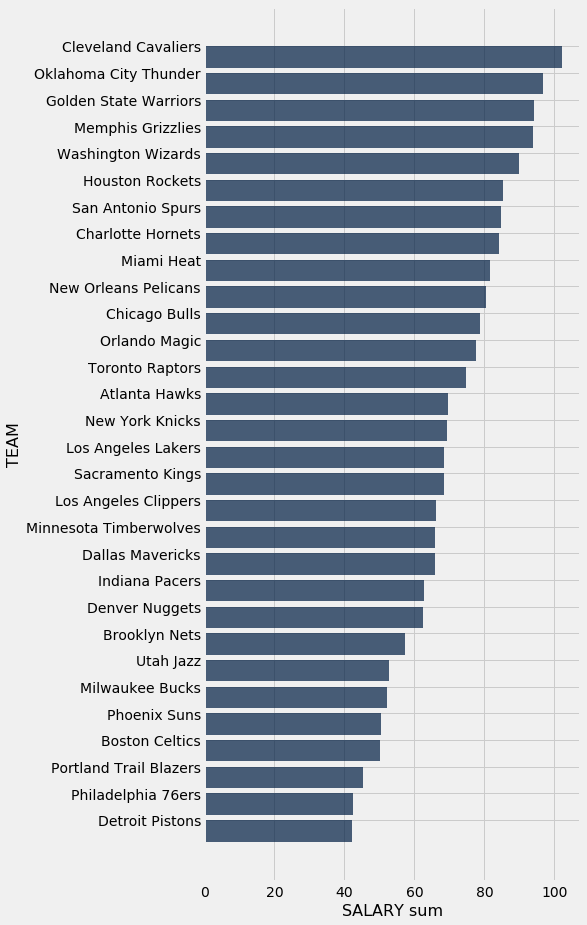

In [34]:
#We can plot it
nba.select('TEAM', 'SALARY').group('TEAM', sum).sort(1, descending = True).barh('TEAM') 

In [35]:
#we could use Position for grouping as well
#If you were a basketball player, what is the most lucrative position for you to play?












POSITION,PLAYER mean,TEAM mean,SALARY mean
C,,,6.08291
SF,,,5.53267
PG,,,5.16549
PF,,,4.95134
SG,,,3.9882


In [18]:
nba.group('POSITION', np.mean).sort('SALARY mean', descending=True)

POSITION,PLAYER mean,TEAM mean,SALARY mean
C,,,6.08291
SF,,,5.53267
PG,,,5.16549
PF,,,4.95134
SG,,,3.9882


In [19]:
nba.group('POSITION').sort('count')

POSITION,count
C,69
SF,82
PF,85
PG,85
SG,96


## Group with multiple columns

In [38]:
all_cones = Table.read_table('cones.csv')
all_cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [39]:
#again, we can use group on the Flavor
all_cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


In [40]:
#but we can group by Flavor and Color if we want to
all_cones.group(['Flavor', 'Color'])

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


In [42]:
all_cones #compare with original

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [41]:
#columns can be given as list or array
all_cones.group(make_array('Flavor', 'Color'))

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


In [43]:
all_cones.group(make_array('Flavor', 'Color'), min)

Flavor,Color,Price min
bubblegum,pink,4.75
chocolate,dark brown,5.25
chocolate,light brown,4.75
strawberry,pink,3.55


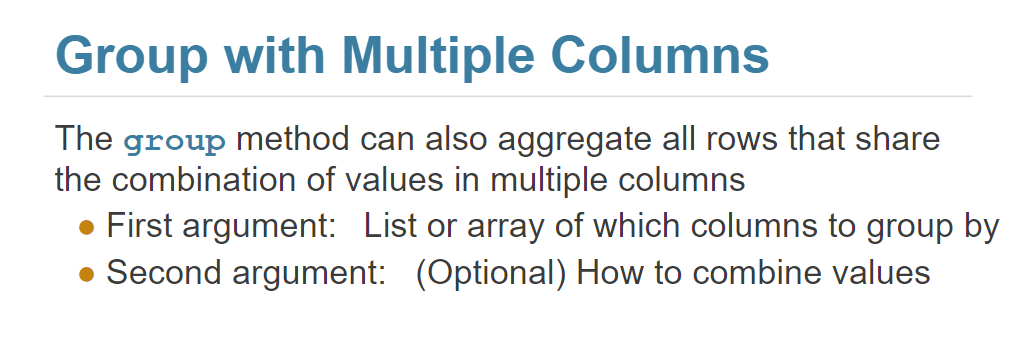

In [44]:
from IPython.display import Image
Image("group2.png", width=600)

## Basketball Data

In [45]:
#I want to find the most expensive player for each team and position (we have 5 positions in total).
#We'll call these people the "starters."
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [46]:
nba.group(make_array('TEAM', 'POSITION'), max)

TEAM,POSITION,PLAYER max,SALARY max
Atlanta Hawks,C,Walter Tavares,12
Atlanta Hawks,PF,Paul Millsap,18.6717
Atlanta Hawks,PG,Jeff Teague,8
Atlanta Hawks,SF,Thabo Sefolosha,4
Atlanta Hawks,SG,Tim Hardaway Jr.,5.74648
Boston Celtics,C,Tyler Zeller,2.61698
Boston Celtics,PF,Jordan Mickey,5
Boston Celtics,PG,Terry Rozier,7.73034
Boston Celtics,SF,Perry Jones,6.79612
Boston Celtics,SG,Zoran Dragic,3.42551


In [21]:
# Does Walter Tavares make 12 million dollars? 

nba.where('PLAYER', 'Walter Tavares')

PLAYER,POSITION,TEAM,SALARY
Walter Tavares,C,Atlanta Hawks,1


In [22]:
#What happened?

nba.where('TEAM', 'Atlanta Hawks').where('POSITION', 'C')

PLAYER,POSITION,TEAM,SALARY
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Walter Tavares,C,Atlanta Hawks,1


In [48]:
nba.select('TEAM', 'POSITION', 'SALARY').group(make_array('TEAM', 'POSITION'), max)

TEAM,POSITION,SALARY max
Atlanta Hawks,C,12
Atlanta Hawks,PF,18.6717
Atlanta Hawks,PG,8
Atlanta Hawks,SF,4
Atlanta Hawks,SG,5.74648
Boston Celtics,C,2.61698
Boston Celtics,PF,5
Boston Celtics,PG,7.73034
Boston Celtics,SF,6.79612
Boston Celtics,SG,3.42551


In [26]:
starters = nba.select('TEAM', 'POSITION', 'SALARY').group(make_array('TEAM', 'POSITION'), max)
starters 

TEAM,POSITION,SALARY max
Atlanta Hawks,C,12
Atlanta Hawks,PF,18.6717
Atlanta Hawks,PG,8
Atlanta Hawks,SF,4
Atlanta Hawks,SG,5.74648
Boston Celtics,C,2.61698
Boston Celtics,PF,5
Boston Celtics,PG,7.73034
Boston Celtics,SF,6.79612
Boston Celtics,SG,3.42551


## Discussion Question

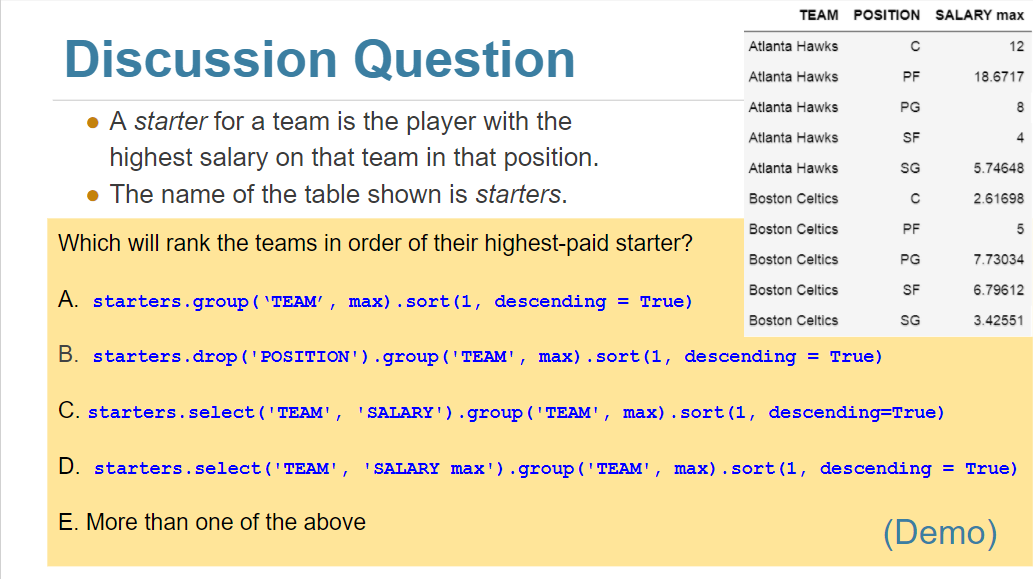

In [27]:
from IPython.display import Image
Image("q14.png", width=800)

In [28]:
starters.group('TEAM', max)

TEAM,POSITION max,SALARY max max
Atlanta Hawks,SG,18.6717
Boston Celtics,SG,7.73034
Brooklyn Nets,SG,24.8949
Charlotte Hornets,SG,13.5
Chicago Bulls,SG,20.0931
Cleveland Cavaliers,SG,22.9705
Dallas Mavericks,SG,15.4937
Denver Nuggets,SG,14
Detroit Pistons,SG,13.913
Golden State Warriors,SG,15.501


In [30]:
#True or False: Shooting Guards (SG) make the most money?

A = True
B = False

In [31]:
starters.drop('POSITION').group('TEAM', max).sort(1, descending = True)

TEAM,SALARY max max
Los Angeles Lakers,25
Brooklyn Nets,24.8949
Cleveland Cavaliers,22.9705
New York Knicks,22.875
Houston Rockets,22.3594
Miami Heat,22.1927
Los Angeles Clippers,21.4687
Oklahoma City Thunder,20.1586
Chicago Bulls,20.0931
San Antonio Spurs,19.689


In [34]:
starter_salaries = starters.select('TEAM', 'SALARY max').group('TEAM', max).sort(1, descending = True)
starter_salaries

TEAM,SALARY max max
Los Angeles Lakers,25
Brooklyn Nets,24.8949
Cleveland Cavaliers,22.9705
New York Knicks,22.875
Houston Rockets,22.3594
Miami Heat,22.1927
Los Angeles Clippers,21.4687
Oklahoma City Thunder,20.1586
Chicago Bulls,20.0931
San Antonio Spurs,19.689


In [35]:
starter_salaries = starter_salaries.relabel('SALARY max max', 'best paid starter salary')
starter_salaries

TEAM,best paid starter salary
Los Angeles Lakers,25
Brooklyn Nets,24.8949
Cleveland Cavaliers,22.9705
New York Knicks,22.875
Houston Rockets,22.3594
Miami Heat,22.1927
Los Angeles Clippers,21.4687
Oklahoma City Thunder,20.1586
Chicago Bulls,20.0931
San Antonio Spurs,19.689


## Joining tables

In [23]:
drinks = Table(['Drink', 'Cafe', 'Price']).with_rows([
    ['Milk Tea', 'Tea One', 4],
    ['Espresso', 'Nefeli',  2],
    ['Latte',    'Nefeli',  3],
    ['Espresso', "Abe's",   2]
])
drinks

Drink,Cafe,Price
Milk Tea,Tea One,4
Espresso,Nefeli,2
Latte,Nefeli,3
Espresso,Abe's,2


In [24]:
discounts = Table().with_columns(
    'Coupon % off', make_array(25, 50, 5),
    'Location', make_array('Tea One', 'Nefeli', 'Tea One')
)
discounts

Coupon % off,Location
25,Tea One
50,Nefeli
5,Tea One


In [56]:
t = drinks.join('Cafe', discounts, "Location")
t

Cafe,Drink,Price,Coupon % off
Nefeli,Espresso,2,50
Nefeli,Latte,3,50
Tea One,Milk Tea,4,25
Tea One,Milk Tea,4,5


In [57]:
t2 = discounts.join('Location', drinks, 'Cafe')
t2

Location,Coupon % off,Drink,Price
Nefeli,50,Espresso,2
Nefeli,50,Latte,3
Tea One,25,Milk Tea,4
Tea One,5,Milk Tea,4


In [58]:
#price after the coupon
t.column('Price') * (100 - t.column(3)) / 100


array([ 1. ,  1.5,  3. ,  3.8])

In [59]:
#price after the coupon, in a table
t.with_column('Discounted', t.column('Price') * (100 - t.column(3)) / 100)


Cafe,Drink,Price,Coupon % off,Discounted
Nefeli,Espresso,2,50,1
Nefeli,Latte,3,50,1.5
Tea One,Milk Tea,4,25,3
Tea One,Milk Tea,4,5,3.8


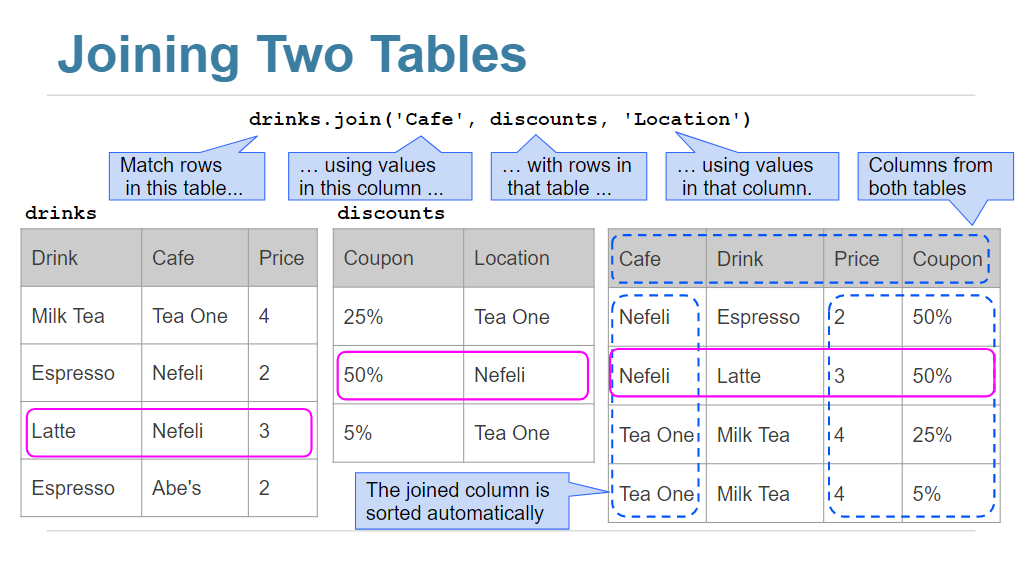

In [60]:
from IPython.display import Image
Image("join.png", width=600)

## Basketball Data

In [36]:
starter_salaries

TEAM,best paid starter salary
Los Angeles Lakers,25
Brooklyn Nets,24.8949
Cleveland Cavaliers,22.9705
New York Knicks,22.875
Houston Rockets,22.3594
Miami Heat,22.1927
Los Angeles Clippers,21.4687
Oklahoma City Thunder,20.1586
Chicago Bulls,20.0931
San Antonio Spurs,19.689


In [37]:
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [42]:
starter_salaries.join('best paid starter salary', nba, 'SALARY').sort(0, descending=True) #.show()

best paid starter salary,TEAM,PLAYER,POSITION,TEAM_2
25,Los Angeles Lakers,Kobe Bryant,SF,Los Angeles Lakers
24.8949,Brooklyn Nets,Joe Johnson,SF,Brooklyn Nets
22.9705,Cleveland Cavaliers,LeBron James,SF,Cleveland Cavaliers
22.875,New York Knicks,Carmelo Anthony,SF,New York Knicks
22.3594,Houston Rockets,Dwight Howard,C,Houston Rockets
22.1927,Miami Heat,Chris Bosh,PF,Miami Heat
21.4687,Los Angeles Clippers,Chris Paul,PG,Los Angeles Clippers
20.1586,Oklahoma City Thunder,Kevin Durant,SF,Oklahoma City Thunder
20.0931,Chicago Bulls,Derrick Rose,PG,Chicago Bulls
19.689,San Antonio Spurs,LaMarcus Aldridge,PF,San Antonio Spurs


In [ ]:
#Challenge for at home: What is going on with DeMarcus Cousins and John Wall? 
#Similarly with Eric Bledsoe and Al Jefferson. 
#Can you fix it?

## Random Selection

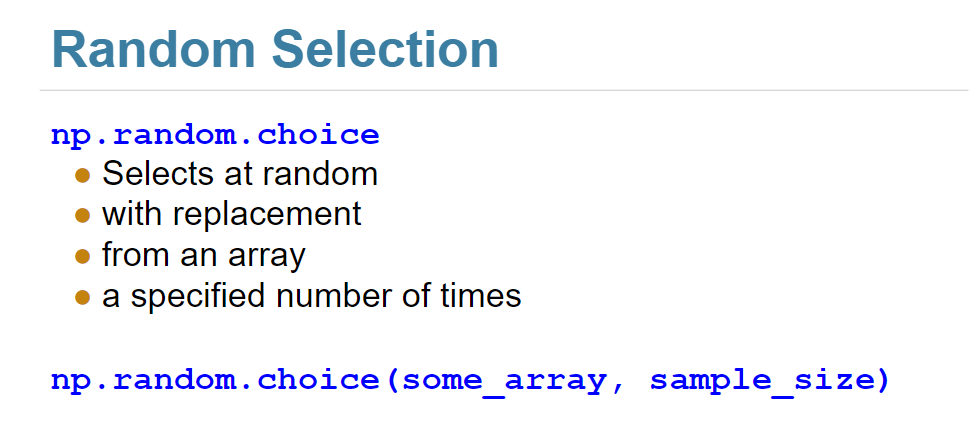

In [61]:
from IPython.display import Image
Image("random.png", width=800)

In [62]:
coin = make_array("Heads", "Tails")
np.random.choice(coin)  #will run just once

'Tails'

In [63]:
#biased_coin (not fair)
biased_coin = make_array("Heads", "Heads", "Heads", "Tails")

In [64]:
tosses = np.random.choice(biased_coin, 100)
tosses

array(['Heads', 'Heads', 'Heads', 'Tails', 'Heads', 'Tails', 'Heads',
       'Heads', 'Heads', 'Tails', 'Heads', 'Heads', 'Heads', 'Tails',
       'Tails', 'Tails', 'Heads', 'Tails', 'Heads', 'Heads', 'Heads',
       'Tails', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads',
       'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads',
       'Heads', 'Tails', 'Heads', 'Heads', 'Tails', 'Heads', 'Tails',
       'Heads', 'Heads', 'Heads', 'Tails', 'Heads', 'Tails', 'Heads',
       'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads',
       'Heads', 'Heads', 'Tails', 'Heads', 'Heads', 'Heads', 'Heads',
       'Heads', 'Heads', 'Heads', 'Tails', 'Heads', 'Heads', 'Heads',
       'Heads', 'Heads', 'Tails', 'Heads', 'Tails', 'Tails', 'Heads',
       'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads',
       'Tails', 'Heads', 'Heads', 'Tails', 'Heads', 'Heads', 'Heads',
       'Tails', 'Tails', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads',
       'Heads', 'Hea

In [65]:
#now we can check how many heads are there
np.count_nonzero(tosses == "Heads")

78

In [66]:
#let's have even more tosses
more_tosses = np.random.choice(coin, 100)
np.count_nonzero(more_tosses == "Heads")

46

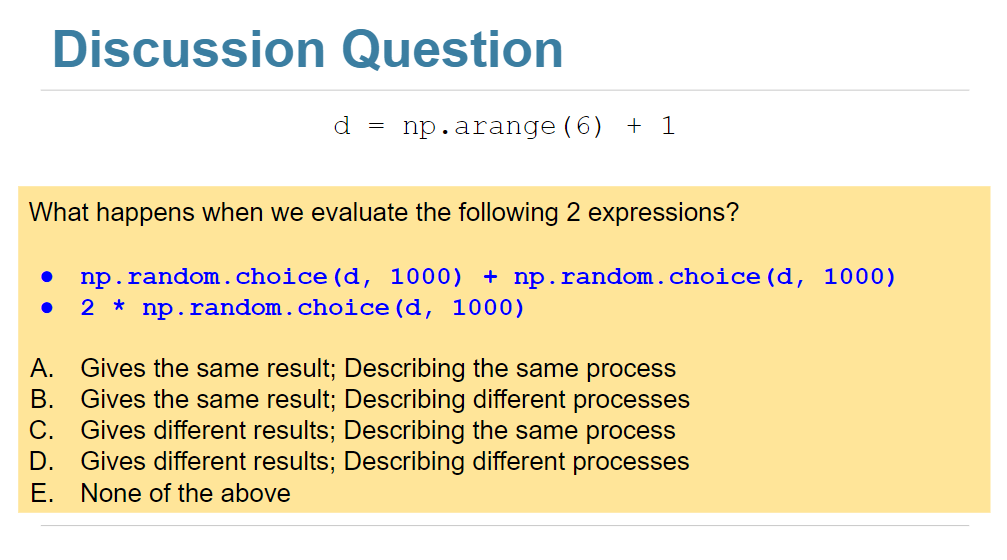

In [67]:
from IPython.display import Image
Image("q15.png", width=800)